# CSE 252A Computer Vision I Fall 2022 - Assignment 2

## Instructor: Ben Ochoa

- Due On: **Wed, Nov. 2, 2022 11:59 PM**.

## Instructions

Please answer the questions below using Python in the attached Jupyter notebook and follow the guidelines below:
 
- This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy on [Canvas](https://canvas.ucsd.edu/).

- All the solutions must be written in this Jupyter notebook.

- After finishing the assignment in the notebook, please export the notebook as a PDF and submit both the notebook and the PDF (i.e. the `.ipynb` and the `.pdf` files) on Gradescope.

- You may use basic algebra packages (e.g. `NumPy`, `SciPy`, etc) but you are not allowed to use the packages that directly solve the problems. Feel free to ask the instructor and the teaching assistants if you are unsure about the packages to use.

- It is highly recommended that you begin working on this assignment early.

**Late Policy:** Assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances. 

## Problem 1 Image filtering [15 pts]

### Problem 1.1 Implementing Convolution[5 pts]


In this problem, you will implement the convolution filtering operation using NumPy functions, but without using the NumPy convolve function directly.

As shown in the lecture, a convolution can be considered as a sliding window that computes a sum of the pixel values weighted by the flipped kernel. Your version will i) zero-pad an image, ii) flip the kernel horizontally and vertically, and iii) compute a weighted sum of the neighborhood at each pixel.

#### Problem 1.1.1  [1 pts]
First you will want to implement the **zero_pad** function.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
gpath = "/content/drive/MyDrive/252A-CV/Ass3/"
# gpath = ""



Mounted at /content/drive


In [2]:
import numpy as np
from time import time
from skimage import io
%matplotlib inline
import math
import matplotlib.pyplot as plt
import pickle
from tqdm.notebook import tqdm
import imageio
import warnings
warnings.filterwarnings("ignore")

In [3]:
np.array([0,0,0])

array([0, 0, 0])

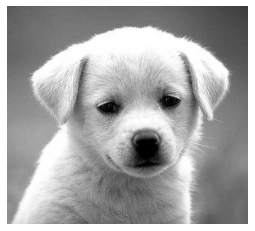

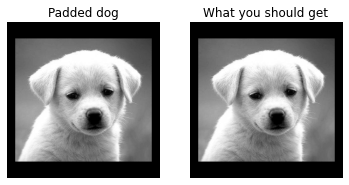

In [4]:
def zero_pad(image, pad_top, pad_down, pad_left, pad_right):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_top = 1, pad_down = 1, pad_left = 2, pad_right = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W)
        pad_left: width of the zero padding to the left of the first column
        pad_right: width of the zero padding to the right of the last column
        pad_top: height of the zero padding above the first row
        pad_down: height of the zero padding below the last row

    Returns:
        out: numpy array of shape (H + pad_top + pad_down, W + pad_left + pad_right)
    """
    """ ==========
    YOUR CODE HERE
    ========== """
    H,W = image.shape
    left0s = np.array([0]*H)
    # print(left0s)
    for i in range(pad_left-1):
      left0s = np.vstack((left0s,[0]*H))      
    # print(left0s)
    if pad_left!=0:
      left0s = left0s.reshape(H,pad_left)


    right0s = np.array([0]*H)
    for i in range(pad_right-1):
      right0s = np.hstack((right0s,[0]*H))
    if pad_right!=0:
      right0s = right0s.reshape(H,pad_right)

    if pad_left!=0:    
      image = np.hstack((left0s,image))
      image = np.hstack((image,right0s))
    # print(image)
    
    # plt.imshow(image,cmap='gray')
    # plt.axis('off')
    # plt.show()
    # return image
    
    top0s = np.array([0]*(W+pad_left+pad_right))
    # print(top0s)
    for i in range(pad_top-1):
      top0s = np.vstack((top0s,[0]*(W+pad_left+pad_right)))
    # print(top0s)
    # top0s = top0s.reshape(W+pad_left+pad_right,pad_top)
    # print(top0s)

    bot0s = np.array([0]*(W+pad_left+pad_right))
    for i in range(pad_down-1):
      bot0s = np.vstack((bot0s,[0]*(W+pad_left+pad_right)))
    
    # bot0s = bot0s.reshape(W+pad_left+pad_right,pad_down)

    if pad_top!=0:
      image = np.vstack((top0s,image))
      image = np.vstack((image,bot0s))
    
    # print(image)



    return image

# Open image as grayscale
img = io.imread(gpath+'dog.jpg', as_gray=True)

# Show image
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom
# pad_width = 2 # width of the padding on the left and right
# pad_height = 1

padded_img = zero_pad(img, pad_height, pad_height, pad_width, pad_width)

# Plot your padded dog
plt.subplot(1,2,1)
plt.imshow(padded_img,cmap='gray')
plt.title('Padded dog')
plt.axis('off')

# Plot what you should get
solution_img = io.imread(gpath+'padded_dog.jpg', as_gray=True)
plt.subplot(1,2,2)
plt.imshow(solution_img,cmap='gray')
plt.title('What you should get')
plt.axis('off')

plt.show()

#### Problem 1.1.2 [2 pts]
Now implement the function **`conv`**, **using at most 2 loops**. This function should take an image $f$ and a kernel $h$ as inputs and output the convolved image $(f*h)$ that has the same shape as the input image (use zero padding to accomplish this). We will only be using kernels with odd width and odd height. Depending on the computer, your implementation should take around a second or less to run.


(300, 332)
(300, 332)
took 0.746656 seconds.


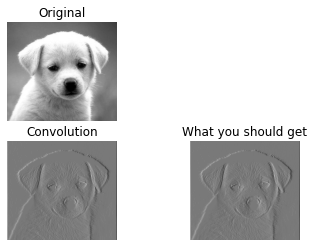

In [5]:
def conv(image, kernel):
    """ An efficient implementation of a convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute a weighted sum of the neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - You should need at most two nested for-loops
        - You may find np.flip() and np.sum() useful
        - You need to handle both odd and even kernel size

    Args:
        image: numpy array of shape (Hi, Wi)
        kernel: numpy array of shape (Hk, Wk)

    Returns:
        out: numpy array of shape (Hi, Wi)
    """
    A, B = image.shape
    C, D = kernel.shape # 13 13
    out = np.zeros((A, B))
    # out = np.array(([0]*A)*B)

    padtd = (C-1)//2
    padlr = (D-1)//2 # 6 6
    image = zero_pad(image,padtd,padtd,padlr,padlr)

    kernel = np.rot90(kernel)
    kernel = np.rot90(kernel)
    # print(kernel)

    # [[i,j   | i,j+1   | i,j+2],
    #  [i+1,j | i+1,j+1 | i+1,j+2],
    #  [i+2,j | i+2,j+1 | i+2,j+2]]
    # op = []
    for i in range(len(image)-C+1):
      # tmp = []
      for j in range(len(image[0])-D+1):
        tmpMat = image[i:i+C,j:j+D]
        # print(tmpMat)
        tmpMat = tmpMat*kernel
        # newPxl = (np.sum(tmpMat))/(C*D)
        # newPxl = (np.sum(tmpMat))/np.sum(kernel)
        newPxl = (np.sum(tmpMat))

        out[i,j] = newPxl
        # tmp.append(newPxl)
      # op.append(tmp)
        # print(i,j)
      #   break
      # break
        
      


    """ ==========
    YOUR CODE HERE
    ========== """
    
    # print(out[0][0])

    return out

# Simple convolution kernel.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

# Open image as grayscale
img = io.imread(gpath+'dog.jpg', as_gray=True)
# To verify
# from scipy import signal
# tp = signal.convolve2d(img,kernel,"same")
# print(tp)



t1 = time()
print(img.shape)
out = np.array(conv(img, kernel))
print(out.shape)

# print(out.shape)
t2 = time()
print("took %f seconds." % (t2 - t1))

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out,cmap='gray')

plt.title('Convolution')
plt.axis('off')

# Plot what you should get
solution_img = io.imread(gpath+'convolved_dog.jpg', as_gray=True)
# print(solution_img.shape)
plt.subplot(2,2,4)
plt.imshow(solution_img,cmap='gray')
plt.title('What you should get')
plt.axis('off')

plt.show()

# print(out[0][0])
# print(tp[0][0])
# print(solution_img[0][0])


#### Problem 1.1.3 [1 pt]
Now let's filter some images! Here, you will apply the convolution function that you just implemented in order to bring about some interesting image effects. More specifically, we will use convolution to blur and sharpen our images.

First we will apply convolution for image blurring. To accomplish this, convolve the dog image with a 13x13 Gaussian filter for $\sigma = 2.0$. You can use the included function to obtain the Gaussian kernel.

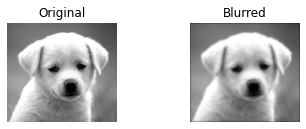

In [6]:
def gaussian2d(sig):
    """
    Creates 2D Gaussian kernel with a sigma of `sig`.
    """
    filter_size = int(sig * 6)
    if filter_size % 2 == 0:
        filter_size += 1
        
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

def blur_image(img,sig):
    """Blur the image by convolving with a Gaussian filter."""
    blurred_img = np.zeros_like(img)
    """ ==========
    YOUR CODE HERE
    ========== """
    kernel = gaussian2d(sig)
    # print("done smoothing")
    return np.array(conv(img,kernel))

    
    
    # return blurred_img

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot blurred image
plt.subplot(2,2,2)
plt.imshow(blur_image(img,2.0),cmap='gray')
plt.title('Blurred')
plt.axis('off')

plt.show()

#### Problem 1.1.4 [1 pt]
Next, we will use convolution to sharpen the images. Convolve the image with the following filter to produce a sharpened result. For convenience, we have defined the filter for you:


In [7]:
sharpening_kernel = np.array([
    [1, 4,     6,  4, 1],
    [4, 16,   24, 16, 4],
    [6, 24, -476, 24, 6],
    [4, 16,   24, 16, 4],
    [1,  4,    6,  4, 1],
]) * -1.0 / 256.0

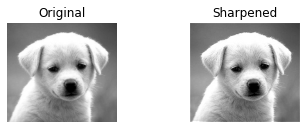

In [8]:
def sharpen_image(img):
    """Sharpen the image by convolving with a sharpening filter."""
    sharpened_img = np.zeros_like(img)
    """ ==========
    YOUR CODE HERE
    ========== """
   
    return(conv(img,sharpening_kernel))
    # return sharpened_img

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img, vmin=0.0, vmax=1.0,cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot sharpened image
plt.subplot(2,2,2)
plt.imshow(sharpen_image(img), vmin=0.0, vmax=1.0,cmap='gray')
plt.title('Sharpened')
plt.axis('off')

plt.show()

### Problem 1.2: Convolution Theory  [5 pts]
#### Problem 1.2.1 [2 pts]
Consider (1) smoothing an image with a 3x3 box filter and then computing the derivative in the y-direction. Also consider (2) computing the derivative first, then smoothing. What is a single convolution kernel that will simultaneously implement both (1) and (2)? Try to give a brief justification for how you arrived at the kernel. (Hint: See shape full convolution)

Use the y-derivative filter  $$[1/2,0,-1/2]^T$$ for this problem.

Answer: -\
From the convolution property of associativity, to reduce time complexity, instead of covoluting the image with the 3x3 Box Smoothing Filter then with y direction filter for gradient,
We can instead first Fully convolve (to maintain the direction independence of convolving) the Box Smoothing kernel and y-derivative filter then use the combination kernel on the original image.
i.e.:

Yfilter * Gaussian filter = GY filter

and Hence:\
Yfilter * Gaussian filter * Image = GY filter * Image
$$
GY filter = f_0 * G \\
  = [x_{1}^{T} * [x_{2}]_{x}]^{T}\\
  = 
(\begin{bmatrix}
 0.5 \\ 0 \\ 0.5 
\end{bmatrix}
*
1/9
\begin{bmatrix}
 1 & 1 & 1 \\
1&1&1\\
1&1&1 
\end{bmatrix})\\
  = 
(\begin{bmatrix}
 0.5 \\ 0 \\ 0.5 
\end{bmatrix}
*
\begin{bmatrix}
 1/9 & 1/9 & 1/9 \\
1/9&1/9&1/9\\
1/9&1/9&1/9 
\end{bmatrix})\\
$$
$$
= 
\begin{bmatrix}
 -0.05555556 &-0.05555556 &-0.05555556\\
 -0.05555556 &-0.05555556 &-0.05555556\\
0 &          0   &       0        \\
 0.05555556 & 0.05555556 & 0.05555556\\
 0.05555556 & 0.05555556 & 0.05555556\\
 \end{bmatrix}\\
 ∴ GY filter =
 1/18
\begin{bmatrix}
 -1 &-1 &-1\\
 -1 &-1 &-1\\
0 &          0   &       0        \\
 1 & 1 & 1\\
 1 & 1 & 1\\
 \end{bmatrix}\\
$$

In [9]:
def convFull(image, kernel):
    A, B = image.shape
    C, D = kernel.shape # 13 13
    out = np.zeros((A+C-1, B+D-1))

    # padtd = (C-1)//2
    # padlr = (D-1)//2 # 6 6
    padtd = int((C-1))
    padlr = int((D-1))
    image = zero_pad(image,padtd,padtd,padlr,padlr)

    kernel = np.rot90(kernel)
    kernel = np.rot90(kernel)

    # [[i,j   | i,j+1   | i,j+2],
    #  [i+1,j | i+1,j+1 | i+1,j+2],
    #  [i+2,j | i+2,j+1 | i+2,j+2]]
    # op = []
    for i in range(len(image)-C+1):
      # tmp = []
      for j in range(len(image[0])-D+1):
        tmpMat = image[i:i+C,j:j+D]
        tmpMat = tmpMat*kernel
        newPxl = (np.sum(tmpMat))

        out[i,j] = newPxl

    return out

In [10]:
f0 = np.array([-1/2,0,1/2]).reshape(1,3).T
# G = gaussian2d(0.6)
G = np.array([[1,1,1],[1,1,1],[1,1,1]])*(1/9)
# print(G)
GYfilter = convFull(G,f0)
print(GYfilter)

[[-0.05555556 -0.05555556 -0.05555556]
 [-0.05555556 -0.05555556 -0.05555556]
 [ 0.          0.          0.        ]
 [ 0.05555556  0.05555556  0.05555556]
 [ 0.05555556  0.05555556  0.05555556]]


#### Problem 1.2.2 [3 pts]
Certain 2D filters can be expressed as a convolution of two 1D filters. Such filters are called separable filters. Give an example of a 3 $\times$ 3 separable filter and compare the number of arithmetic operations it takes to
convolve an n $\times$ n image using that filter before and after separation. Count both, the number of multiplication and addition operations in each case.

Assume that the convolution of the image and filter is performed in "valid" mode, i.e., the image is not padded before convolution.

**Answer**:-\
The 3x3 box filter we used to blur the image in the above question is also a seperable filter, i.e. it can be split into 2 smaller filters which when fully convolved on each other will give the original box convolve.

Hence:\
$$
1/9
\begin{bmatrix}
 1 & 1 & 1 \\
1&1&1\\
1&1&1 
\end{bmatrix}\\
=
1/3
\begin{bmatrix}
1\\
1\\
1\\
\end{bmatrix}
*
1/3
\begin{bmatrix}
1&1&1\\
\end{bmatrix}\\
$$

⇒ Now, when we use the 3x3 matrix for convolution, for each window to sub matrix multiplication there would be first 9 multiplication followed by the addition of all these answers which is equal to 8 additions.\
→ Due to it being a valid convolution, there will be no padding hence this process will happen len(image)-2 * len(image[0])-2 times i.e len(row)-2*len(col)-2 i.e. (n-2)*(n-2) times = $n^{2} -4n +4$\
Hence Total arithmatic operations for a 3x3 matrix = $17*(n^{2} -4n +4)$
\
\
⇒ Now, when we use the 1x3 matrix and 3x1 matrix:\
For 1x3: There will be 3 multiplications and 2 additions, n*(n-2) times = $5(n^{2} -2n)$\
→ Converting the images's shape to (n-2),(n) because valid.

<br />

⇒ Similarly, for 3x1:\
$5((n-2)*(n-2))$\
Converting the images's shape to n-2,n-2\
Finally total arithmatic operations to: \
= $5((n-2)*(n-2)) + 5(n^{2} -2n)$\
= $5(n-2)^{2} + 5((n-2)n)$\
= $5[(n-2)^{2} + (n-2)n]$



&nbsp;
&nbsp;

**To summarize**:\
For 3x3:\
$17*(n^{2} -4n +4)$\
= $9*(n^{2} -4n +4)$ Multiplications + $8*(n^{2} -4n +4)$ Additions\
= $9*(n-2)^{2}$ Multiplications + $8*(n-2)^{2}$ Additions\
≈ $9n^{2}$ Multiplications and $8n^{2}$ Additions

AND

For combination of 1x3 and 3x1:\
= $5[(n-2)^{2} + (n-2)n]$ Addition Multiplications.\
= $3[(n-2)^{2} + (n-2)n]$ Multiplications and $2[(n-2)^{2} + (n-2)n]$ Additions\
≈ $3[n^{2} + n^{2}]$ Multiplications and $2[n^{2} + n^{2}]$ Additions\
≈ $6n^{2}$ Multiplications and $2n^{2}$ Additions

**Hence, Splitting a filter into smaller filters reduces time complexity.**






In [11]:
x1 = np.array([1,1,1]).reshape(1,3)*1/3
x2 = np.array([1,1,1]).reshape(1,3).T*1/3
BoxFilter = convFull(x1,x2)
print(BoxFilter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


### Problem 1.3 Template Matching [5 pts]
Suppose that you are a clerk at a grocery store. One of your responsibilites is to check the shelves periodically and stock them up whenever there are sold-out items. You got tired of this laborious task and decided to build a computer vision system that keeps track of the items on the shelf.

Luckily, you have learned in CSE 252A (or are learning right now) that convolution can be used for template matching: a filpped template g is multiplied with regions of a larger image f to measure how similar each region is to the template. Note that you will want to flip the filter before giving it to your convolution function, so that it is overall not flipped when making comparisons. You will also want to subtract off the mean value of the image or template (whichever you choose, subtract the same value from both the image and template) so that our solution is not biased toward higher-intensity (white) regions.

The template of a product (template.jpg) and the image of the shelf (shelf.jpg) is provided. We will use convolution to find the product in the shelf.

<img src="template.jpg" alt="template" width="25px"/>
<img src="shelf.jpg" alt="shelf" width="600px"/>


In [12]:
def normalize(img):
    # assert img.shape[2] == 3
    maxi = np.amax(img)
    mini = np.amin(img)
    return (img - mini)/(maxi-mini)

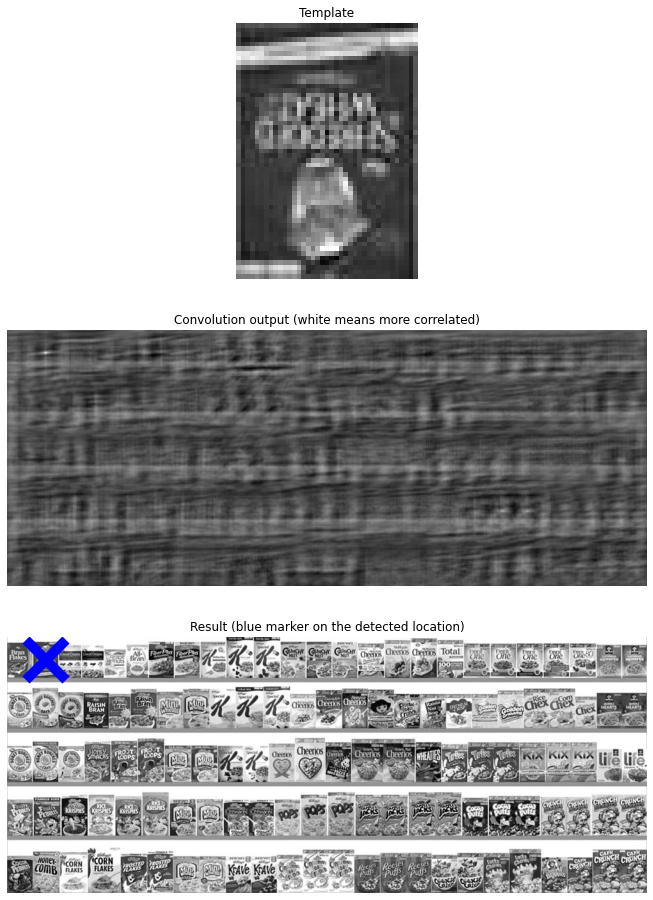

In [13]:
# Load template and image in grayscale
img = io.imread(gpath+'shelf.jpg')
img_gray = io.imread(gpath+'shelf.jpg', as_gray=True)
temp = io.imread(gpath+'template.jpg')
temp_gray = io.imread(gpath+'template.jpg', as_gray=True)

# Perform a convolution between the image (grayscale) and the template (grayscale) and store 
# the result in the out variable
""" ==========
YOUR CODE HERE
========== """
meann = np.sum(temp_gray)/(temp_gray.shape[0]*temp_gray.shape[1])
# print(img_gray[0][0])
img_gray[:,:] = img_gray[:,:]-meann
temp_gray[:,:]= temp_gray[:,:]-meann
# print(img_gray[0][0])
temp_gray = np.rot90(temp_gray)
temp_gray = np.rot90(temp_gray)

out = conv(img_gray,temp_gray)
# out = normalize(out)
# print(np.amax(out))
# print(np.amin(out))
result = np.where(out == np.amax(out))
coords = list(zip(result[0], result[1]))
# print(coords)


# Display product template
plt.figure(figsize=(20,16))
plt.subplot(3, 1, 1)
plt.imshow(temp_gray, cmap="gray")
plt.title('Template')
plt.axis('off')

# Display convolution output
plt.subplot(3, 1, 2)
plt.imshow(out, cmap="gray")
plt.title('Convolution output (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img_gray, cmap="gray")
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detected location
plt.plot(coords[0][1], coords[0][0], 'bx', ms=40, mew=10)
plt.show()

## Problem 2: Edge detection [21 pts]

In this problem, you will write a function to perform Canny edge detection. The following steps need to be implemented.

### Problem 2.1 Smoothing [1 pt]
First, we need to smooth the images in order to prevent noise from being considered as edges. For this assignment, use a 9x9 Gaussian kernel filter with $\sigma = 1.5$ to smooth the images.

In [14]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.signal import convolve
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = [5, 5]

In [15]:
def gaussian2d(sig=None):
    """Creates a 2D Gaussian kernel with
    side length `filter_size` and a sigma of `sig`."""
    filter_size = int(sig * 6)
    if filter_size % 2 == 0:
        filter_size += 1
        
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

In [16]:
def smooth(image):
    """ ==========
    YOUR CODE HERE
    ========== """
    gkernel = gaussian2d(1.5)
    return np.array(conv(image,gkernel))
    

Original:


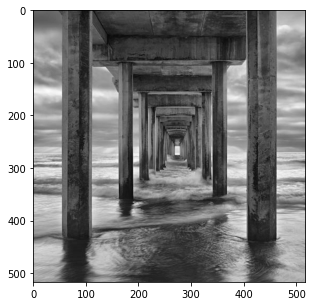

Smoothed:


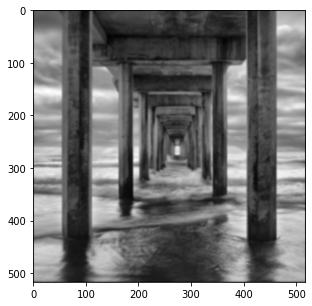

In [17]:
# Load image in grayscale
image = io.imread(gpath+'sio_pier.jpg', as_gray=True)
assert len(image.shape) == 2, 'image should be grayscale; check your Python/skimage versions'
smoothed = smooth(image)
print('Original:')
plt.imshow(image, cmap=cm.gray)
plt.show()

print('Smoothed:')
plt.imshow(smoothed, cmap=cm.gray)
plt.show()

### Problem 2.2 Gradient Computation [5 pts]
After you have finished smoothing, find the image gradient in the horizontal and vertical directions. Compute the gradient magnitude image as $|G| = \sqrt{G_x^2 + G_y^2}$. The edge direction for each pixel is given by $G_\theta = \tan^{-1}\left(\frac{G_y}{G_x}\right)$.

In [18]:
def gradient(image):
    """ ==========
    YOUR CODE HERE
    ========== """
    dx = np.array([-1/2,0,1/2]).reshape(1,3)
    dy = np.array([-1/2,0,1/2]).reshape(1,3).T
    Gx = np.array(conv(image,dx))
    Gy = np.array(conv(image,dy))

    # Bx,By = np.gradient(image)
    # print(image.shape,Gx.shape,Gy.shape)
    Gmag = np.zeros_like(Gx)
    Gtheta = np.zeros_like(Gx)
    Gmag[:,:] = (Gx[:,:]**2 + Gy[:,:]**2)**0.5
    
    for i in range(len(Gx)):
      for j in range(len(Gx[0])):
        # Gmag[i,j] = (Gx[i,j]**2 + Gy[i,j]**2)**0.5
        Gtheta[i,j] = math.degrees(math.atan(Gy[i,j]/Gx[i,j]))
    # Gtheta[:,:] = math.atan((Gy[:,:]/Gx[:,:]))
    # print(Gmag)

    return Gmag,Gtheta, Gx, Gy 

<class 'numpy.ndarray'>
Gradient magnitude:


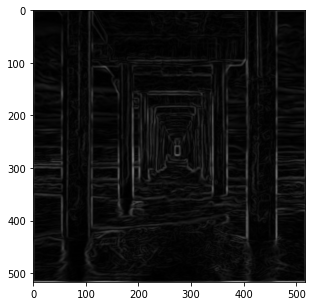

In [19]:
print(type(smoothed))
g_mag, g_theta, Gx, Gy = gradient(smoothed)
Nx,Ny = np.gradient(smoothed)
# print(Gx,"\n")
# print(Nx,"\n")
# print(Gy,"\n")
# print(Ny)
print('Gradient magnitude:')
plt.imshow(g_mag, cmap=cm.gray)
plt.show()
# print(g_theta)

In [20]:
# print(Gx[10,35],Bx[10,35])
# print(Gy[10,35],By[10,35])
Gx[35,10]

-0.0008484369653103674

### Problem 2.3 Non-Maximum Suppression [7 pts]
We would like our edges to be sharp, unlike the ones in the gradient image. Use non-maximum suppression to preserve all local maxima and discard the rest. You can use the following method to do so:

  - For each pixel in the gradient magnitude image:
    - Round the gradient direction Θ to the nearest multiple of 45∘ (which we will refer to as ¬).
    - Compare the edge strength at the current pixel to the pixels along the $+ve$ and $-ve$ gradient direction in the 8-connected neighborhood.
    - If the pixel does not have a larger value than both of its two neighbors in the $+ve$ and $-ve$ gradient directions, suppress the pixel's value (set it to 0). By following this process, we preserve the values of only those pixels which have maximum gradient magnitudes in the neighborhood along the $+ve$ and $-ve$ gradient directions.
  - Return the result as the NMS response.

In [21]:
def nms(g_mag, g_theta):
  """ ==========
  YOUR CODE HERE
  ========== """
  
  g_theta[:,:] = 45*np.round(g_theta[:,:]/45)
  # print(g_theta)
  out = np.zeros_like(g_mag)
  for i in range(len(g_mag)):
    for j in range(len(g_mag[0])):
      f = 0
      if i == 0 or i == len(g_mag)-1 or j == 0 or j==len(g_mag[0])-1:
        out[i,j]=g_mag[i,j]
        continue
      if g_theta[i,j] == 90 or g_theta[i,j] == -90:
        # f = 1 # Vertical
        if g_mag[i,j] >= g_mag[i-1,j] and g_mag[i,j] >= g_mag[i+1,j]:
          out[i,j]=g_mag[i,j]
          # out[i,j]=255
        else:
          out[i,j] = 0
        

      elif g_theta[i,j] == 135 or g_theta[i,j] == -45:
        # f = 2 # L diagonal
        if g_mag[i,j] >= g_mag[i-1,j-1] and g_mag[i,j] >= g_mag[i+1,j+1]:
          out[i,j]=g_mag[i,j]
        else:
          out[i,j] = 0
        

      elif g_theta[i,j] == 180 or g_theta[i,j] == 0 or g_theta[i,j] == -180:
        # f = 3 # Horizontal
        if g_mag[i,j] >= g_mag[i,j-1] and g_mag[i,j] >= g_mag[i,j+1]:
          out[i,j]=g_mag[i,j]
        else:
          out[i,j] = 0

      elif g_theta[i,j] == -135 or g_theta[i,j] == 45:
        # f = 2 # R diagonal
        if g_mag[i,j] >= g_mag[i-1,j+1] and g_mag[i,j] >= g_mag[i+1,j-1]:
          out[i,j]=g_mag[i,j]
        else:
          out[i,j] = 0
        
        
      


  # print("done nms")
  return out



NMS:


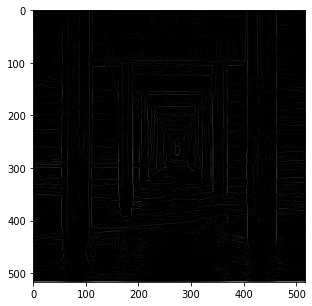

In [22]:
nms_image = nms(g_mag, g_theta)
print('NMS:')
plt.imshow(nms_image, cmap=cm.gray)
plt.show()

In [23]:
print(nms_image)

[[0.15106442 0.14871081 0.16318508 ... 0.25768209 0.23612997 0.24042069]
 [0.14809371 0.         0.         ... 0.         0.         0.23647438]
 [0.16098613 0.         0.         ... 0.         0.         0.25908032]
 ...
 [0.25813494 0.         0.         ... 0.         0.         0.27614614]
 [0.23044001 0.         0.         ... 0.         0.         0.25144744]
 [0.22975408 0.22684754 0.2464736  ... 0.27216221 0.25029869 0.25535825]]


### Problem 2.4 Hysteresis Thresholding [8 pts]
Choose suitable values of thresholds and use the thresholding approach decribed in lecture 6. This will remove the edges caused by noise and color variations.

  - Define two thresholds `t_min` and `t_max`. 
  - If the `nms > t_max`, then we select that pixel as an edge.
  - If `nms < t_min`, we reject that pixel.
  - If `t_min < nms < t_max`, we select the pixel only if there is a path from/to another pixel with `nms > t_max`. (Hint: Think of all pixels with `nms > t_max` as starting points and run BFS/DFS from these starting points).
  - The choice of value of low and high thresholds depends on the range of values in the gradient magnitude image. You can start by setting the high threshold to some percentage of the max value in the gradient magnitude image, e.g. thres_high = 0.2 * image.max(), and the low threshold to some percentage of the high threshold, e.g. thres_low = 0.85 * thres_high. And then you can tune those values however you want.

In [24]:
def hysteresis_threshold(image, g_theta, use_g_theta=False):
  """ ==========
  YOUR CODE HERE
  ========== """
  # print(image.max())
  # tmax = .145*image.max()
  # tmin = .55*tmax
  tmax = .145*image.max()
  tmin = .45*tmax
  out = np.zeros_like(image)
  # visited = set()
  # print(tmax)

  # def BFS(i,j):
  #   if i<0 or j<0 or i>=len(image) or j>=len(image[0]):
  #     return
  #   if (i,j) in visited:
  #     return
  #   if image[i,j]
  # image = np.array(image)
  # print(image.shape)
  # def BFS(i,j):
  #   tmp = [image[i-1,j-1],image[i-1,j],image[i-1,j+1],image[i,j-1],image[i,j+1],image[i+1,j-1],image[i+1,j],image[i+1,j+1]]
  #   # print(tmp)
  #   if max(tmp)>=tmax:
  #     out[i][j] = 255


  visited = set()

  def BFS(i,j):
    if (i,j) in visited:
      return
    visited.add((i,j))
    if (i-1>=0 and i-1<len(image) and j>=0 and j<len(image[0])) and image[i-1,j]<=tmax and image[i-1,j]>=tmin:
      out[i-1,j] = 255
      BFS(i-1,j)

    if (i-1>=0 and i-1<len(image) and j+1>=0 and j+1<len(image[0])) and image[i-1,j+1]<=tmax and image[i-1,j+1]>=tmin:
      out[i-1,j+1] = 255
      BFS(i-1,j+1)

    if (i>=0 and i<len(image) and j+1>=0 and j+1<len(image[0])) and image[i,j+1]<=tmax and image[i,j+1]>=tmin:
      out[i,j+1] = 255
      BFS(i,j+1)

    if (i+1>=0 and i+1<len(image) and j+1>=0 and j+1<len(image[0])) and image[i+1,j+1]<=tmax and image[i+1,j+1]>=tmin:
      out[i+1,j+1] = 255
      BFS(i+1,j+1)

    if (i+1>=0 and i+1<len(image) and j>=0 and j<len(image[0])) and image[i+1,j]<=tmax and image[i+1,j]>=tmin:
      out[i+1,j] = 255
      BFS(i+1,j)

    if (i+1>=0 and i+1<len(image) and j-1>=0 and j-1<len(image[0])) and image[i+1,j-1]<=tmax and image[i+1,j-1]>=tmin:
      out[i+1,j-1] = 255
      BFS(i+1,j-1)
    
    if (i>=0 and i<len(image) and j-1>=0 and j-1<len(image[0])) and image[i,j-1]<=tmax and image[i,j-1]>=tmin:
      out[i,j-1] = 255
      BFS(i,j-1)
    
    if (i-1>=0 and i-1<len(image) and j-1>=0 and j-1<len(image[0])) and image[i-1,j-1]<=tmax and image[i-1,j-1]>=tmin:
      out[i-1,j-1] = 255
      BFS(i-1,j-1)
    
  
  for i in range(len(image)):
    for j in range(len(image[0])):
      # if i == 0 or i == len(g_mag)-1 or j == 0 or j==len(g_mag[0])-1:
      #   if image[i,j]>=tmax:
      #     # print(i,j)
      #     out[i,j]=255
      #     BFS(i,j)
      #   continue

      if image[i,j]>=tmax:
        out[i,j] = 255
        BFS(i,j)

      # if image[i,j]<tmax and image[i,j]>=tmin:
      #   BFS(i,j)

  # print(image.max())
  # print(np.max(image))
  # print(tmax)
  # print(tmin)
  return out



Thresholded:


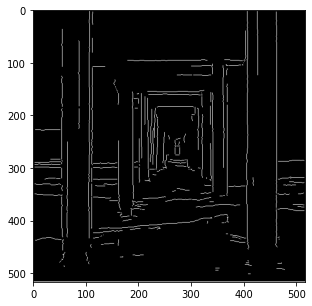

In [25]:
thresholded = hysteresis_threshold(nms_image, g_theta)
print('Thresholded:')
plt.imshow(thresholded, cmap=cm.gray)
plt.show()

In [26]:
# print(nms_image[:2,5:10])
# print(thresholded[:2,5:10])
# print(tmax)

## Problem 3 Corner detection [13 pts]

### Problem 3.1 [12 pts]
In this problem, we are going to build a corner detector. This should be done according to the lecture slides. You should fill in the function <code>corner_detect</code> below, which takes as input <code>image, nCorners, smoothSTD, windowSize</code> -- where `smoothSTD` is the standard deviation of the smoothing kernel and `windowSize` is the window size for corner detector and non-maximum suppression. In the lecture, the corner detector was implemented using a hard threshold. Do not do that; instead, return the `nCorners` strongest corners after non-maximum suppression. This way you can control exactly how many corners are returned. Run your code on all four images (with `nCorners` = 20) and display outputs as shown below. You may find `scipy.ndimage.filters.gaussian_filter` helpful for smoothing.

In this problem, try the following different standard deviation ($\sigma$) parameters for the Gausian smoothing kernel: 0.5, 1, 2 and 4. For a particular $\sigma$, you should take the kernel size to be $6\times\sigma$ (add $1$ if the kernel size is even). So for example if $\sigma=2$, corner detection kernel size should be $13$. This should be followed throughout all of the experiments in this assignment.

There will be a total of 24 images as outputs: 4 choices of `smoothSTD` x (2 `dino` + 2 `matrix` + 2 `warrior` images).

![dinoCorner1](dinoCorner1.png)
![dinoCorner2](dinoCorner2.png)



In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import imageio
from scipy.signal import convolve

def rgb2gray(rgb):
    """ Convert rgb image to grayscale.
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [28]:
def convValid(image, kernel):
    """ An efficient implementation of a convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute a weighted sum of the neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - You should need at most two nested for-loops
        - You may find np.flip() and np.sum() useful
        - You need to handle both odd and even kernel size

    Args:
        image: numpy array of shape (Hi, Wi)
        kernel: numpy array of shape (Hk, Wk)

    Returns:
        out: numpy array of shape (Hi, Wi)
    """
    A, B = image.shape
    C, D = kernel.shape # 13 13
    out = np.zeros((A-C+1,B-D+1))
    # out = np.array(([0]*A)*B)

    padtd = (C-1)//2
    padlr = (D-1)//2 # 6 6
    # image = zero_pad(image,padtd,padtd,padlr,padlr)

    kernel = np.rot90(kernel)
    kernel = np.rot90(kernel)
    # print(kernel)

    # [[i,j   | i,j+1   | i,j+2],
    #  [i+1,j | i+1,j+1 | i+1,j+2],
    #  [i+2,j | i+2,j+1 | i+2,j+2]]
    # op = []
    for i in range(len(image)-C+1):
      # tmp = []
      for j in range(len(image[0])-D+1):
        tmpMat = image[i:i+C,j:j+D]
        # print(tmpMat)
        tmpMat = tmpMat*kernel
        # newPxl = (np.sum(tmpMat))/(C*D)
        # newPxl = (np.sum(tmpMat))/np.sum(kernel)
        newPxl = (np.sum(tmpMat))

        out[i,j] = newPxl
        # tmp.append(newPxl)
      # op.append(tmp)
        # print(i,j)
      #   break
      # break
        
      


    """ ==========
    YOUR CODE HERE
    ========== """
    
    # print(out[0][0])

    return out

def gaussian2d2(sig):
    """
    Creates 2D Gaussian kernel with a sigma of `sig`.
    """
    filter_size = int(sig * 6)
    if filter_size % 2 == 0:
        filter_size += 1
        
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

def blur_image2(img,sig):
    """Blur the image by convolving with a Gaussian filter."""
    blurred_img = np.zeros_like(img)
    """ ==========
    YOUR CODE HERE
    ========== """
    kernel = gaussian2d2(sig)
    # print("done smoothing")
    return np.array(convValid(img,kernel))


In [29]:
def nms_withoutTheta(image):
  midi = image.shape[0]//2
  try:
    if image[midi][midi]==image.max():
      return image[midi][midi]
    else:
      return "no"
  except Exception as e:
    # print(image)
    assert 1==2

def corner_detect(image, nCorners, smoothSTD, windowSize):
  """Detect corners on a given image.

  Args:
      image: Given a grayscale image on which to detect corners.
      nCorners: Total number of corners to be extracted.
      smoothSTD: Standard deviation of the Gaussian smoothing kernel.
      windowSize: Window size for corner detector and non-maximum suppression.

  Returns:
      Detected corners (in image coordinate) in a numpy array (n*2).

  """
  
  """ ==========
  YOUR CODE HERE
  ========== """

  # using sigma:
  # print("lol")
  evsSGmat = np.zeros_like(image)

  A, B = image.shape
  image = blur_image(image,smoothSTD) 
  # print("smooth",image.shape)
  
  # C, D = windowSize.shape
  C = windowSize
  D = windowSize
  padtd = (C-1)//2
  padlr = (D-1)//2
  image = zero_pad(image,padtd,padtd,padlr,padlr)

  
  # gradients:
  Gmag,Gtheta,Gx,Gy = gradient(image)
  # Gx,Gy = np.gradient(image)
  # print("Gx,Gy")
  # print(Gx.shape,Gy.shape)
  
  fx2 = Gx*Gx
  fx2 = np.array(conv(fx2,np.ones((C,D))))
  
  

  fy2 = Gy*Gy 
  fy2 = np.array(conv(fy2,np.ones((C,D))))
  
  fxy = Gx*Gy
  fxy = np.array(conv(fxy,np.ones((C,D))))

  # print("dx,dy,image,eigen,smooth_img")
  # print(fx2.shape,fy2.shape,image.shape,evsSGmat.shape,(A,B))
  

  # eigen val
  # evsSGmat = np.zeros_like(image)
  for i in range(padtd,len(image)-padtd):
    # tmp = []
    for j in range(padtd,len(image[0])-padtd):
      spatialGMat = np.array([[fx2[i][j],fxy[i][j]],[fxy[i][j],fy2[i][j]]])

      val,vec = np.linalg.eig(spatialGMat)
      evsSGmat[i-padtd,j-padtd] = min(val)


  # nms
  corners = {}
  # evsSGmat = zero_pad(evsSGmat,padtd,padtd,padlr,padlr)
  # for i in range(len(image)-C+1):
  #   for j in range(len(image[0])-D+1):
  for i in range(padtd,len(evsSGmat)-padtd):
    # tmp = []
    for j in range(padtd,len(evsSGmat[0])-padtd):
      # print(i,j)
      wind = evsSGmat[i-padtd:i+padtd+1,j-padtd:j+padtd+1]
      # print(i,i+C,j,j+D)
      nmss = nms_withoutTheta(wind)
      if nmss!="no":
        corners[(j,i)] = nmss


  

  lis = sorted(corners.items(), key=lambda item: item[1],reverse=True)
  # print("tuple:",(int(padlr),int(padlr)))

  # print(lis[2],type(lis[2]))
  # if (int(padlr),int(padlr)) in lis:
  #   print("removing window's edge case")
  #   lis = lis[1:nCorners+1] # To remove (1,1) edge case
  # else:
  #   print("not removing2")
  lis = lis[:nCorners]

  with open("temp.txt",'a',encoding = 'utf-8') as f:
    f.write(str(smoothSTD)+str(windowSize)+"\n"+str(lis)+"\n")


  corns = []
  for i in lis:
    corns.append(i[0])
  corns.sort(key = lambda x:x[0])
  # if (int(padlr),int(padlr)) in corns:
  #   corns.remove((int(padlr),int(padlr)))
  # else:
  # corns = corns[:-1]
  print("final Corners",corns)

  # print("DEBUG")
  
  return np.array(corns)

smooth stdev: 0.5
window size: 3
final Corners [(651, 245), (675, 206), (690, 211), (695, 215), (808, 268), (866, 507), (888, 806), (902, 799), (909, 802), (910, 766), (912, 802), (944, 1253), (959, 1203), (966, 732), (971, 1194), (1021, 1185), (1022, 1247), (1188, 729), (1273, 1092), (1316, 1078)]
final Corners [(331, 575), (341, 558), (404, 358), (497, 431), (525, 545), (579, 429), (586, 483), (590, 430), (598, 387), (610, 476), (624, 441), (665, 427), (667, 358), (712, 631), (717, 408), (721, 634), (734, 648), (734, 379), (741, 603), (766, 387)]
final Corners [(532, 877), (567, 854), (624, 781), (637, 805), (639, 1050), (641, 1052), (661, 1003), (710, 1155), (828, 456), (837, 465), (839, 464), (849, 460), (851, 471), (852, 458), (873, 509), (879, 509), (984, 1269), (1022, 1140), (1051, 978), (1061, 953)]
final Corners [(521, 256), (631, 259), (682, 650), (723, 680), (757, 872), (775, 827), (815, 612), (829, 163), (834, 532), (836, 173), (888, 585), (913, 749), (920, 1170), (948, 111

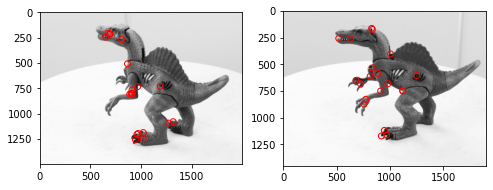

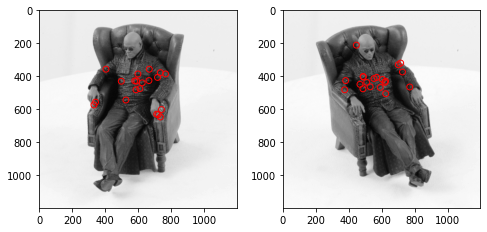

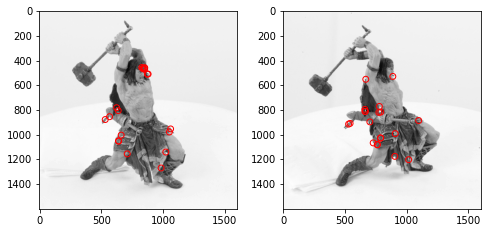

smooth stdev: 1
window size: 7
final Corners [(579, 228), (637, 256), (671, 947), (689, 987), (704, 224), (792, 667), (850, 561), (850, 550), (867, 505), (876, 164), (903, 1253), (920, 1299), (958, 1204), (967, 733), (1020, 1186), (1048, 617), (1087, 614), (1273, 1091), (1355, 1079), (1396, 1064)]
final Corners [(300, 752), (306, 481), (331, 834), (344, 559), (374, 350), (387, 1018), (389, 978), (405, 357), (447, 1066), (523, 547), (587, 387), (650, 487), (699, 872), (709, 487), (710, 872), (710, 629), (718, 481), (742, 602), (744, 563), (818, 804)]
final Corners [(474, 1191), (512, 909), (590, 781), (593, 743), (615, 585), (624, 781), (627, 800), (636, 804), (640, 1051), (663, 1001), (712, 1154), (759, 1043), (838, 465), (877, 511), (887, 520), (900, 909), (1039, 1150), (1051, 979), (1064, 949), (1089, 986)]
final Corners [(520, 257), (614, 708), (695, 751), (698, 953), (722, 681), (805, 532), (812, 611), (828, 165), (832, 511), (835, 173), (836, 508), (911, 748), (921, 1168), (946, 1

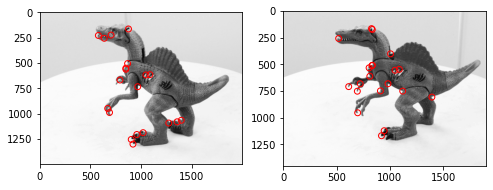

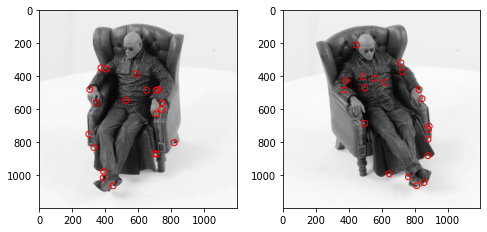

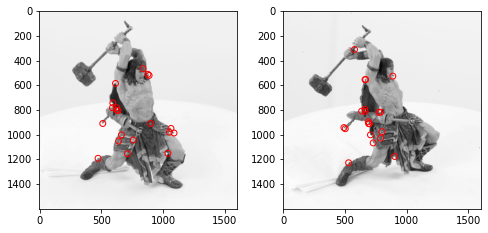

smooth stdev: 2
window size: 13
final Corners [(577, 227), (693, 1022), (749, 719), (839, 560), (847, 558), (869, 503), (877, 171), (905, 1251), (922, 1296), (961, 1207), (970, 735), (1018, 1188), (1030, 652), (1036, 442), (1046, 618), (1075, 674), (1198, 998), (1274, 1087), (1354, 1077), (1394, 1064)]
final Corners [(306, 477), (330, 835), (334, 1050), (344, 560), (351, 517), (359, 365), (373, 349), (384, 1019), (387, 982), (392, 1008), (423, 1097), (447, 1069), (488, 998), (527, 245), (586, 385), (605, 993), (708, 873), (714, 962), (745, 559), (819, 802)]
final Corners [(514, 906), (570, 857), (587, 778), (592, 745), (615, 588), (627, 785), (631, 801), (635, 264), (697, 195), (720, 131), (723, 1109), (791, 573), (879, 507), (897, 912), (910, 1384), (1037, 1150), (1054, 982), (1061, 949), (1088, 985), (1179, 1159)]
final Corners [(613, 709), (695, 751), (696, 952), (707, 856), (720, 682), (736, 882), (806, 529), (811, 612), (826, 166), (923, 1166), (967, 1201), (969, 1167), (984, 683)

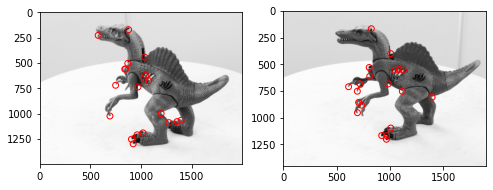

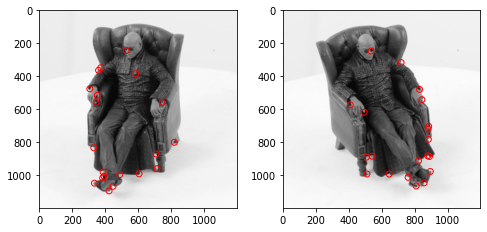

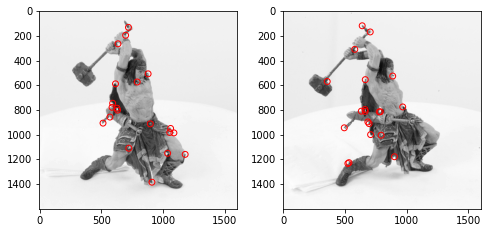

smooth stdev: 4
window size: 25
final Corners [(692, 1020), (759, 680), (863, 712), (872, 497), (877, 165), (878, 753), (911, 1246), (926, 1293), (957, 848), (965, 1200), (974, 739), (1022, 1191), (1042, 439), (1074, 674), (1203, 1000), (1260, 1163), (1273, 1082), (1353, 1074), (1389, 1061), (1497, 934)]
final Corners [(304, 816), (307, 474), (328, 839), (340, 1050), (370, 350), (379, 1019), (384, 988), (426, 1092), (446, 1073), (491, 1002), (496, 1030), (540, 237), (601, 990), (700, 547), (704, 874), (714, 969), (753, 974), (767, 880), (826, 797), (869, 157)]
final Corners [(515, 905), (571, 863), (583, 773), (593, 747), (616, 592), (630, 791), (643, 348), (695, 1226), (719, 141), (728, 1103), (748, 912), (759, 379), (793, 479), (881, 559), (900, 1225), (905, 1380), (1002, 1387), (1034, 1150), (1057, 948), (1158, 1222)]
final Corners [(530, 260), (691, 947), (700, 861), (717, 686), (739, 882), (746, 976), (806, 609), (809, 523), (824, 168), (833, 497), (927, 1163), (967, 1170), (968, 

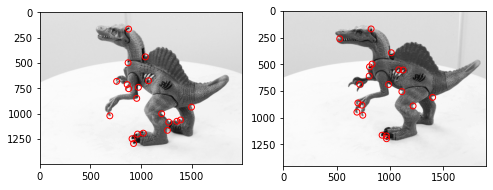

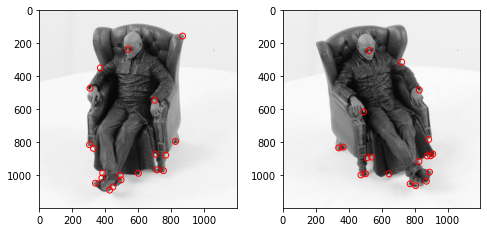

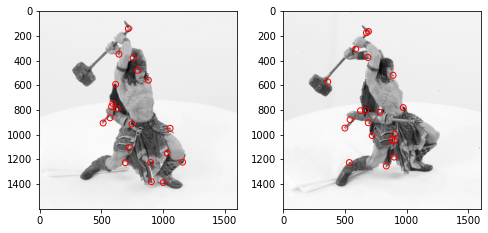

In [139]:
def show_corners_result(imgs, corners):
  fig = plt.figure(figsize=(8, 8))
  ax1 = fig.add_subplot(221)
  ax1.imshow(imgs[0], cmap='gray')
  ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=35, edgecolors='r', facecolors='none')

  ax2 = fig.add_subplot(222)
  ax2.imshow(imgs[1], cmap='gray')
  ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=35, edgecolors='r', facecolors='none')
  plt.show()

open('temp.txt', 'w').close()
for smoothSTD in (0.5, 1, 2, 4):
  windowSize = int(smoothSTD * 6)
  if windowSize % 2 == 0:
      windowSize += 1
      
  print('smooth stdev: %r' % smoothSTD)
  print('window size: %r' % windowSize)

  nCorners = 20

  # read images and detect corners on images
  
  imgs_din = []
  crns_din = []
  imgs_mat = []
  crns_mat = []
  imgs_war = []
  crns_war = []
  for i in range(2):
      img_din = imageio.imread(gpath+'dino/dino' + str(i) + '.png')
      imgs_din.append(rgb2gray(img_din))
      # downsize your image in case corner_detect runs slow in test
      # imgs_din.append(rgb2gray(img_din)[::5, ::5])
      # tmp = corner_detect(imgs_din[i], nCorners, 3,13)
      # print("top corners",tmp)
      # crns_din.append(tmp)
      crns_din.append(corner_detect(imgs_din[i], nCorners, smoothSTD, windowSize))
      # crns_din.append(corner_detect2(imgs_din[i], nCorners, smoothSTD, windowSize))
      # break
      img_mat = imageio.imread(gpath+'matrix/matrix' + str(i) + '.png')
      imgs_mat.append(rgb2gray(img_mat))
      # downsize your image in case corner_detect runs slow in test
      # imgs_mat.append(rgb2gray(img_mat)[::2, ::2])
      crns_mat.append(corner_detect(imgs_mat[i], nCorners, smoothSTD, windowSize))

      img_war = imageio.imread(gpath+'warrior/warrior' + str(i) + '.png')
      imgs_war.append(rgb2gray(img_war))
      # downsize your image in case corner_detect runs slow in test
      # imgs_war.append(rgb2gray(img_war)[::2, ::2])
      crns_war.append(corner_detect(imgs_war[i], nCorners, smoothSTD, windowSize))

  show_corners_result(imgs_din, crns_din)
  show_corners_result(imgs_mat, crns_mat)
  show_corners_result(imgs_war, crns_war)

### Problem 3.2 [1 pts]
Comment on your results and observations. You don't need to comment per output; just discuss any trends you see for the detected corners as you change the windowSize and increase the smoothing w.r.t the two pairs of images (warrior and matrix). Also discuss whether you are able to find corresponding corners for the pairs of images.



#### Answer:
The trend I see is a sharp increase in performance(corner detection) with the increase in smoothing, but this sharp increase flatlines by the fourth image, and by intuition, I can say that it will start to drop further as instead of only removing noise from the image we will begin eliminating essential features leading to the accuracy of corner detection dropping drastically.

Regarding the window size, I think it follows a similar trend to the smoothing, but instead of affecting the features of the image, it just separates how big is our NMS radius and results in more spread out better corner detection instead of a giant clusters. But this, too, will be bad for accuracy after a point, as we will start missing medium-sized corners.


## Problem 4 Epipolar rectification and feature matching [43 pts]

### 4.1 Epipolar rectification [22 pts]

In this problem, we are going to perform epipolar rectification. Given calibrated stereo cameras (i.e., calibration matrices $K_1$ and $K_2$, camera rotation matrices $R_1$ and $R_2$, camera translation vectors $t_1$ and $t_2$), you are expected to determine the rotation matrix $R$ and calibration matrix $K$ of the virtual cameras.
Your goal is to complete the function <code>epipolarRecification</code>, which determines the calibration matrix and rotation matrix of both cameras, the translation vector of each of the cameras, and matching planar transformations that epipolar rectify the two images acquired by the cameras. The destination virtual cameras have the same centers as the source real cameras. 


#### 4.1.1 Camera translation matrices and Projective Transformation matrices [6 pts]
To calculate the camera translation from cameras with the same camera center, you will have to complete the <code>cameraTranslation</code> first. 
Another function you need to complete is <code>calcProjectiveTransformation</code>, which calculates the planar projective transformation from cameras with the same camera center.
The camera calibration matrix (same for both cameras) will be calculated by <code>calcDestinateK</code>. This is provided for you.
To get the rotation matrix $R$ of the virtual camera, we usually interpolate halfway between the two 3D rotations embodied by $R_1$ and $R_2$. For simplicity, this will be also given to you.

In [30]:
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np
import math
import pickle
from math import floor, ceil

In [31]:
def cameraTranslation(R_real, t_real, R_virt):
  '''
  Calculate the camera translation of virtual camera from real camera with the same camera center.
  
  Args: 
  R_real: The rotation matrix of the real camera.
  t_real: The translation vector of the real camera.
  R_virt: The rotation matrix of the virtual camera.
  
  Returns:
  The translation vector of the virtual camera.
  '''
  """ ==========
  YOUR CODE HERE
  ========== """
  return np.dot(np.dot(R_virt, R_real.T),t_real)
    

In [32]:
def calcProjectiveTransformation(K_real, R_real, K_virt, R_virt):
  '''
  Calculates the planar projective transformation from cameras with the same camera center.
  This function determines the planar projective transformation from the image of a 3D point in the real camera to its image in the virtual camera 
  where P_real = K_real * R_real * [I | -C] and P_virt = K_virt * R_virt * [I | -C].
  
  Args:
  K_real: The calibration matrix of the real camera.
  R_real: The rotation matrix of the real camera.
  K_virt: The calibration matrix of the virtual camera.
  R_virt: The rotation matrix of the virtual camera.
  
  Returns:
  The transformation matrix.
  '''
  """ ==========
  YOUR CODE HERE
  ========== """
  # H
  return np.dot(np.dot(np.dot(K_virt, R_virt), R_real.T),np.linalg.inv(K_real))
    

In [33]:
def calcDestinateK(srcK1, srcK2):
    '''
    Camera calibration matrix (same for both cameras)
    '''
    alpha = (srcK1[0][0] + srcK2[0][0] + srcK1[1][1] + srcK2[1][1]) // 4 
    x0 = (srcK1[0][2] + srcK2[0][2]) // 2
    y0 = (srcK1[1][2] + srcK2[1][2]) // 2
    dstK = np.zeros((3, 3))
    dstK[0][0] = alpha
    dstK[0][2] = x0
    dstK[1][1] = alpha
    dstK[1][2] = y0
    dstK[2][2] = 1
    return dstK

In [34]:
import scipy.linalg
import math
def calcDestinateR(srcR1, srcR2,src_t1,src_t2):
    '''
    interpolate between two rotation matrices
    '''
    
    # Rotation matrix that is half way between srcR1 and srcR2
    Rinterp = scipy.linalg.expm(0.5*scipy.linalg.logm(srcR2@srcR1.T))@srcR1
    
    # Rotation matrix to compose with above rotation matrix such that relative camera translation vector is aligned with the X-axis
    u = cameraTranslation( srcR2, src_t2,Rinterp ) - cameraTranslation( srcR1, src_t1, Rinterp)
    vhat = np.array([[1],[0],[0]])

    if 0 > u.T@vhat:
        #Unit vector along negative X-axis instead, so that the images are not upside down
        vhat[0] = -1
        
    # The 3-vector 'axis' defines an axis and theta is the rotation about the axis.
    theta =  math.acos((u.T@vhat)[0,0]/np.linalg.norm(u))
    axis = np.cross(u.reshape(-1),vhat.reshape(-1))
    
    # The angle-axis representation is a 3-vector omega where the norm of omega is theta and the unitized omega is the unit vector representing the axis of rotation.
    omega = (theta/np.linalg.norm(axis))*axis
    omega = omega.reshape(-1)

    # omega_x is the skew symmetric matrix form of omega
    omega_x  = np.array([[0, -omega[2], omega[1]], 
                         [omega[2], 0, -omega[0]], 
                         [-omega[1], omega[0], 0]])
    
    
    R_x = scipy.linalg.expm(omega_x)
    dstR = R_x@Rinterp
    
    return dstR

In [35]:
def epipolarRecification(srcK1, srcR1, src_t1, 
                         srcK2, srcR2, src_t2):
    '''
    Given two calibrated cameras, this function determines the calibration matrix and rotation matrix of both cameras, the translation vector of each of the cameras, and matching planar transformations that epipolar rectify the two image acquired by the cameras.  The destination cameras have the same centers as the source cameras.
    
    Args:
    srcK1: The calibration matrix of the first source camera.
    srcR1: The rotation matrix of the first source camera.
    src_t1: The translation vector of the first source camera.
    srcK2: The calibration matrix of the second source camera.
    srcR2: The rotation matrix of the second source camera.
    src_t2: The translation vector of the second source camera.
    
    Returns: 
    dstK: The calibration matrix of the virtual cameras.
    dst_t1: The translation vector of the first virtual camera.
    dst_t2: The translation vector of the second virtual camera.
    H1, H2: The image rectification transformation matrices.
    '''
    dstR = calcDestinateR(srcR1, srcR2,src_t1,src_t2)
    
    dst_t1 = cameraTranslation(srcR1, src_t1, dstR)
    dst_t2 = cameraTranslation(srcR2, src_t2, dstR)
    
    dstK = calcDestinateK(srcK1, srcK2)
    
    H1 = calcProjectiveTransformation(srcK1, srcR1, dstK, dstR)
    H2 = calcProjectiveTransformation(srcK2, srcR2, dstK, dstR)
   
    return dstK, dst_t1, dst_t2, H1, H2

#### Problem 4.1.2 Warp Image [10 pts]
After calling <code>epipolarRectification</code>, we can get the projective transformation matrices $H1$ and $H2$. Next, we will geometrically transform (i.e., 'warp') the image so that the epipolar lines are image rows. You have to complete <code>warpImage</code> using the backward method in Lecture 7. Note the destination images are required to be the same size as the source images.

In [36]:
def normalize(img):
    assert img.shape[2] == 3
    maxi = img.max()
    mini = img.min()
    return (img - mini)/(maxi-mini)

# def to_homog(points): 
#     # convert points from inhomogeneous to homogeneous
#     # 
#     # inputs: 
#     # points is a dxn matrix where n is the number of d dimensional inhomogeneous points 
#     # (e.g., d = 3 for 3D inhomogeneous points)
#     #
#     # outputs:
#     # homo_points is a (d+1)xn matrix of n d-dimensional homogeneous points
    
#     # write your code here

    
#     return np.vstack((points,[1]*len(points)))
def to_homog(points):
    return np.array([points[1],points[0],1])

def from_homog(points):
    return np.array([int(points[1]//points[2]),int(points[0]//points[2])])
# def from_homog(homoPoints):
    # convert points from homogeneous to inhomogeneous
    # 
    # inputs:
    # points_homog is a (d+1)xn matrix of n d-dimensional homogeous points (e.g., d = 2 
    # for 2D homogeneous points)
    #
    # outputs:
    # inhomo_points is a dxn matrix of n d-dimensional inhomogeous points 
    
    # write your code here
    # w_t = homoPoints[:len(homoPoints)-1,:]
    # print(homoPoints[:len(homoPoints)-1,:])
    # print(homoPoints[:len(homoPoints)-1,:])
    # output = homoPoints[:len(homoPoints)-1,:]/homoPoints[len(homoPoints)-1,:]
    # print(output)
    # homoPoints = np.array(homoPoints)
    # return homoPoints[:len(homoPoints)-1,:]/homoPoints[len(homoPoints)-1,:]

def warpImage(image, H, out_height, out_width):
    """
    Performs the warp of the full image content.
    Calculates bounding box by piping four corners through the transformation.
    
    Args: 
    image: Image to warp
    H: The image rectification transformation matrices.
    out_height, out_width: The shape of output image.
    
    Returns:
    Out: An inverse warp of the image, given a homography.
    min_x, min_y, max_x, max_y: The minimum/maxmum of warped image bound.
    """
    """ ==========
    YOUR CODE HERE
    ========== """
    # maxi = float("-inf")
    # mini = float("inf")
    # maxiCoord = [float("-inf"),float("-inf")]
    # miniCoord = [float("inf"),float("inf")]
    
    # print(image.shape)
    # out = np.zeros_like(image)
    # print(out.shape)
    
    # Getting the boundaries of the new image
    topLeft = to_homog([0,0])
    bottomLeft = to_homog([len(image)-1,0])
    topRight = to_homog([0,len(image[0])-1])
    bottomRight = to_homog([len(image)-1,len(image[0])-1])

    # Destination boundaries for warped image
    topLeftHD = np.dot(H,topLeft)
    bottomLeftHD = np.dot(H,bottomLeft)
    topRightHD = np.dot(H,topRight)
    bottomRightHD = np.dot(H,bottomRight)
    # print("TL \t BL\tTr\tbr")
    # print(topLeftHD,bottomLeftHD,topRightHD,bottomRightHD)
    
    # Getting inhomo pnts of Destination imgs
    topLeftD = from_homog(topLeftHD)
    bottomLeftD = from_homog(bottomLeftHD)
    topRightD = from_homog(topRightHD)
    bottomRightD = from_homog(bottomRightHD)
    # print(topLeftD,bottomLeftD,topRightD,bottomRightD)
    # To iterate over dest img
    min_x = int(min(topLeftD[1],bottomLeftD[1]))
    min_y = int(min(topLeftD[0],topRightD[0]))
    max_x = int(max(topRightD[1],bottomRightD[1]))
    max_y = int(max(bottomLeftD[0],bottomRightD[0]))

    # print(topLeftD[1],bottomLeftD[1],
    # topLeftD[0],topRightD[0],
    # topRightD[1],bottomRightD[1],
    # bottomLeftD[0],bottomRightD[0])

    cnt = 0
    out = np.zeros((out_height, out_width,3))
    out = np.array(out,np.int32)

    for y in tqdm(range(int(min_y),int(max_y))):
      for x in range(int(min_x),int(max_x)):
        yxH = to_homog([y,x])
        tmp1 = np.dot(np.linalg.inv(H),yxH)
        tmp2 = from_homog(tmp1)
        # print(tmp2)
        try: # handling list index out of bound excp
          # print(y-min_y,x-min_x)
          # print(tmp2[0],tmp2[1])
          if y<0 or x<0 or tmp2[0]<0 or tmp2[1]<0: # cause negative indices are valid
            continue
          out[y-min_y,x-min_x] = image[tmp2[0]][tmp2[1]]
          # print(image[tmp2[0]][tmp2[1]])
        except Exception as e:
          cnt +=1
          # print(e)

    print(cnt, "went out")
    # return out, miniCoord[0], miniCoord[1], maxiCoord[0], maxiCoord[1]
    out = normalize(out)
    return out, min_x, min_y , max_x, max_y
  

In [37]:
file_param = open(gpath+'param.pkl', 'rb')
param = pickle.load(file_param)
file_param.close()
srcK1, srcR1, src_t1 = param['srcK1'], param['srcR1'], param['src_t1']
srcK2, srcR2, src_t2 = param['srcK2'], param['srcR2'], param['src_t2']


In [38]:
dstK, dst_t1, dst_t2, H1, H2 = epipolarRecification(srcK1, srcR1, src_t1, 
                                                    srcK2, srcR2, src_t2)

Original image 1:


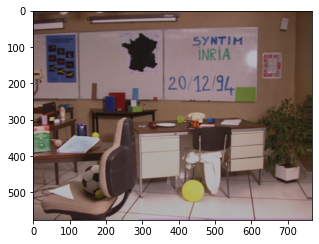

In [39]:
src1 = io.imread(gpath+'Sport0_OG0.bmp')
plt.imshow(src1)
print('Original image 1:')

  0%|          | 0/623 [00:00<?, ?it/s]

36393 went out
Unbounded Rectified image 1:


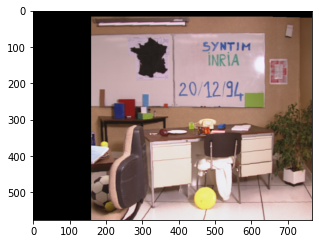

In [40]:
height1, width1, _ = src1.shape
rectified_im1_unbounded, min_x1, min_y1, max_x1, max_y1 = warpImage(src1, H1, height1, width1)
plt.imshow(rectified_im1_unbounded)
print('Unbounded Rectified image 1:')

In [41]:

rectified_im1_unbounded[200][20]
print(min_x1, min_y1, max_x1, max_y1)

-160 -18 621 605


Original image 2:


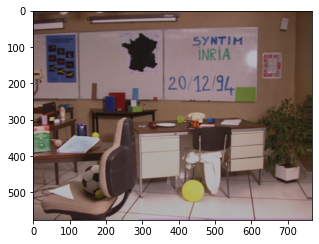

In [42]:
src2 = io.imread(gpath+'Sport1_OG0.bmp')
plt.imshow(src1)
print('Original image 2:')

  0%|          | 0/626 [00:00<?, ?it/s]

38264 went out
Unbounded Rectified image 2:


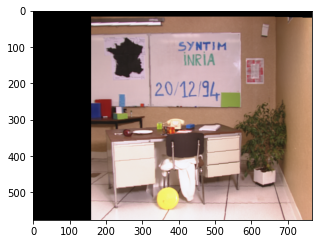

In [43]:
height2, width2, _ = src2.shape
rectified_im2_unbounded, min_x2, min_y2, max_x2, max_y2 = warpImage(src2, H2, height2, width2)
plt.imshow(rectified_im2_unbounded)
print('Unbounded Rectified image 2:')

In [44]:
print(rectified_im2_unbounded[575][2])
print(min_x2, min_y2, max_x2, max_y2)

[0. 0. 0.]
-160 -18 621 608


#### 4.1.3 Partial bounded retification [3 pts]
In the resulting images, although they are epipolar rectified, you should observe portions of the source images being transformed "out of bounds" of the destination images.
To fix this problem, we can introduced a 2D transformation containing a translation (i.e., $T1$ and $T2$). 
$$T1 = \begin{bmatrix}
1 & 0 & -min\_x1 - 0.5\\ 
0 & 1 & -min(min\_y1, min\_y2) - 0.5\\ 
0 & 0 & 1
\end{bmatrix}$$
$$T2 = \begin{bmatrix}
1 & 0 & -min\_x2 - 0.5\\ 
0 & 1 & -min(min\_y1, min\_y2) - 0.5\\ 
0 & 0 & 1
\end{bmatrix}$$
$H1$, $H2$ can be updated by left multiplying $T1$, $T2$, respectivley. Again, geometrically tranform the images under the updated $H1$, $H2$. The destination image is required to be the same size as the source images. In the resulting images, although they are (still) epipolar rectified, you should observe the portions of the source images being transformed are no longer "out of bounds" on the top and left of the destination images.

In [45]:
def partialboundedRetification(min_x1, min_y1, min_x2, min_y2, H1, H2):
    '''
    Update the projective transformation matries so that the rectified images are no longer 'out of bound'. 
    '''
    """ ==========
    YOUR CODE HERE
    ========== """
    T1 = np.array([[1,0,-min_x1-.5],[0,1,-min(min_y1,min_y2)-.5],[0,0,1]])
    T2 = np.array([[1,0,-min_x2-.5],[0,1,-min(min_y1,min_y2)-.5],[0,0,1]])
    H1 = np.dot(T1,H1)
    H2 = np.dot(T2,H2)
    # return H1_bounded, H2_bounded
    return H1,H2

  0%|          | 0/624 [00:00<?, ?it/s]

44097 went out
The partial bounded rectified image 1:


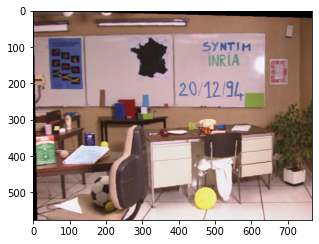

In [46]:
H1_bounded, H2_bounded = partialboundedRetification(min_x1, min_y1, min_x2, min_y2, H1, H2)
rectified_im1_bounded, min_x1_bounded, min_y1_bounded, max_x1_bounded, max_y1_bounded = warpImage(src1, H1_bounded, height1, width1)
plt.imshow(rectified_im1_bounded)
print('The partial bounded rectified image 1:')

  0%|          | 0/627 [00:00<?, ?it/s]

46391 went out
The partial bounded rectified image 2:


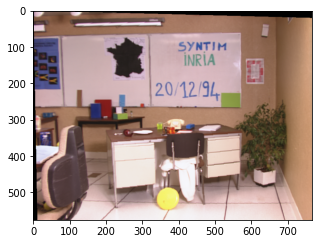

In [47]:
rectified_im2_bounded, min_x2_bounded, min_y2_bounded, max_x2_bounded, max_y2_bounded = warpImage(src2, H2_bounded, height2, width2)
plt.imshow(rectified_im2_bounded)
print('The partial bounded rectified image 2:')

#### 4.1.4 Completely bounded rectification [3 pts]
Finally, determine the size of the destination images that completely bound the transformed images. 


 $$dst1Width = int( x1max - x1min + 1 )$$
 $$dst2Width = int( x2max - x2min + 1 )$$
 $$dstHeight = int(max( y1max, y2max ) - min( y1min, y2min ) + 1 )$$
   
   
 Again geometrically transform the images under the updated 2D projective transformation matrices $H1$ and $H2$ (these are not updated a second time). You should complete the function <code>completelyBoundedRectification</code>. The destination images are required to be the size you just calculated. In the resulting images, you should observe the source images being transformed such that they are epipolar rectified and are completely bounded.

In [48]:
def completelyBoundedRectification(src1, src2, H1_bounded, H2_bounded, min_x1_bounded, max_x1_bounded,
                                   min_y1_bounded, max_y1_bounded,min_x2_bounded, max_x2_bounded,
                                   min_y2_bounded, max_y2_bounded):
    '''
    Determine the size of the destination images (same size for both) that completely bound the transformed images. geometrically transform the images under the updated 2D projective transformation matrices H1 and H2 (these are not updated a second time).
    '''
    """ ==========
    YOUR CODE HERE
    ========== """
    width1 = int(max_x1_bounded - min_x1_bounded + 1)
    width2 = int(max_x2_bounded - min_x2_bounded + 1)
    commHt = int(max(max_y1_bounded,max_y2_bounded) - min(min_y1_bounded,min_y2_bounded)+1)
    rectified_im1_final, min_x1_bounded, min_y1_bounded, max_x1_bounded, max_y1_bounded = warpImage(src1, H1_bounded, commHt, width1)
    rectified_im2_final, min_x2_bounded, min_y2_bounded, max_x2_bounded, max_y2_bounded = warpImage(src2, H1_bounded, commHt, width2)

    
    return rectified_im1_final, rectified_im2_final

In [49]:
rectified_im1_final, rectified_im2_final = completelyBoundedRectification(src1, src2, H1_bounded, H2_bounded,min_x1_bounded, max_x1_bounded,
                                   min_y1_bounded, max_y1_bounded,min_x2_bounded, max_x2_bounded,min_y2_bounded, max_y2_bounded)

  0%|          | 0/624 [00:00<?, ?it/s]

18133 went out


  0%|          | 0/624 [00:00<?, ?it/s]

18133 went out


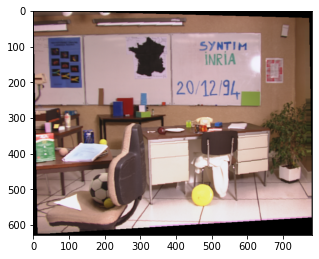

In [50]:
plt.imshow(rectified_im1_final)

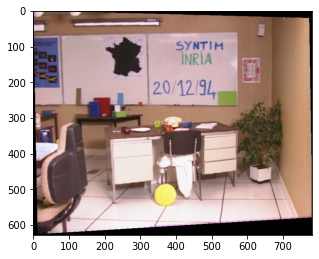

In [51]:
plt.imshow(rectified_im2_final)

### Problem 4.2 Feature matching [4 pts]
#### 4.2.1 SSD (Sum Squared Distance) Matching [1 pts]
Complete the function <code>ssdMatch</code>:  
SSD = $\sum_{x,y}|W_1(x,y)-W_2(x,y)|^2$

In [52]:
def ssdMatch(img1, img2, c1, c2, R):
    """Compute SSD given two windows.
    
    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        SSD matching score for two input windows.
        
    """
    """ ==========
    YOUR CODE HERE
    ========== """
    # R: window ht/2 = width/2
    c1[0] = c1[0]-R
    c1[1] = c1[1]-R
    c2[0] = c2[0]-R
    c2[1] = c2[1]-R

    ssd = 0
    for i in range(c1[1],c1[1]+(2*R)+1):
        for j in range(c1[0],c1[0]+(2*R)+1):
          x = i-c1[1] + c2[1]
          y = j-c1[0] + c2[0]
          ssd += (img1[i,j] - img2[x,y])**2
            

   
    return ssd

In [53]:
# Here is the code for you to test your implementation
img1 = np.array([[1, 2, 7, 3], [2, 8, 5, 7], [3, 2, 7, 0]])
img2 = np.array([[4, 3, 3, 4], [4, 6, 8, 5], [3, 8, 9, 4]])
print(ssdMatch(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 83
print(ssdMatch(img1, img2, np.array([2, 1]), np.array([2, 1]), 1))
# should print 91
print(ssdMatch(img1, img2, np.array([1, 1]), np.array([2, 1]), 1))
# should print 113

83
91
113


#### Problem 4.2.2 NCC (Normalized Cross-Correlation) Matching [2 pts]

Write a function <code>ncc_match</code> that implements the NCC matching algorithm for two input windows.

NCC = $\sum_{i,j}\tilde{W_1} (i,j)\cdot \tilde{W_2} (i,j)$

where $\tilde{W} = \frac{W - \overline{W}}{\sqrt{\sum_{k,l}(W(k,l) - \overline{W})^2}}$ is a mean-shifted and normalized version of the window and $\overline{W}$ is the mean pixel value in the window W.

In [54]:
def normalize_window(window):
    _mean = np.mean(window)
    _stdev = np.sqrt(np.sum((window - _mean) ** 2))
    return (window - _mean) / (_stdev + 1e-6)
 
def ncc_match(img1, img2, c1, c2, R):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        NCC matching score for two input windows.

    """
    
    """ ==========
    YOUR CODE HERE
    ========== """
    # C = (2*R) + 1
    # D = (2*R) + 1

    # # R: window ht/2 = width/2
    # c1[0] = c1[0]-R
    # c1[1] = c1[1]-R
    # c2[0] = c2[0]-R
    # c2[1] = c2[1]-R

    # w1 = img1[c1[1]:c1[1]+C,c1[0]:c1[0]+D]
    # w2 = img2[c2[1]:c2[1]+C,c2[0]:c2[0]+D]

    # print(w1.shape,w1.shape)

    # w_1 = normalize_window(w1)
    # w_2 = normalize_window(w2)

    # return np.sum(w_1*w_2)

    window_size = 2*R+1
    pad = (window_size-1)//2
    _W1 = img1[c1[1]-pad:c1[1]+pad+1,c1[0]-pad:c1[0]+pad+1]
    _W2 = img2[c2[1]-pad:c2[1]+pad+1,c2[0]-pad:c2[0]+pad+1]
    # print(_W1,_W2)
    W1,W2 = normalize_window(_W1), normalize_window(_W2)
    ncc = np.sum(W1*W2)
    return ncc



    

In [55]:
# test NCC match
img1 = np.array([[1, 2, 7, 3], [2, 8, 5, 7], [3, 2, 7, 0]])
img2 = np.array([[4, 3, 3, 4], [4, 6, 8, 5], [3, 8, 9, 4]])

print (ncc_match(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 0.338

print (ncc_match(img1, img2, np.array([2, 1]), np.array([2, 1]), 1))
# should print 0.250

print (ncc_match(img1, img2, np.array([1, 1]), np.array([2, 1]), 1))
# should print 0.0498

0.338080521919092
0.25005290998739566
0.0498764779064851


#### Problem 4.2.3  [1 pts]

**i.  Which feature matching algorithm do you think is better to use between SSD and NCC?**

##### Answer Part i:
Between Normalized Cross-Correlation(NCC) and Sum of Squared Differences (SSD), despite the high computation cost of NCC, NCC easily is a better matching algorithm than SSD because it balances out the outlier such as difference in light intensity. In fact, NCC is just Normalized SSD.


**ii. Give a scenario where your answer in part i would result in better matches.**

##### Answer Part ii:
So, NCC and SSD would give similar matching metrics in ordinary cases, but for any fluctuations in external factors, for instance, a lighting change, NCC would trump SSD.\
For example, a matching of corners/features between a similar-looking image captured during day time and one at night time will lead to low accuracy if SSD is used, but accuracy by NCC would still stand high.


### Problem 4.3 Naive Matching [8 pts]

Equipped with the corner detector and the NCC matching function, we are ready to start finding correspondences. NCC matching radius (R in the code below) is the radius of the NCC patch of size $2\times R+1$. One naive strategy is to try and find the best match between the two sets of corner points. Write a script that does this, namely, for each corner in image1, find the best match from the detected corners in image2 (or, if the NCC match score is too low, then return no match for that point). You will have to figure out a good threshold (NCCth) value by experimentation.

Write a function <code>naive_matching</code> and call it as below. Examine your results for 10, 20, and 30 detected corners in each image. Choose the number of detected corners to maximize the number of correct matching pairs. <code>naive_matching</code> will call your NCC matching code.

**Properly label or mention which output corresponds to which choice of number of corners. The total number of outputs is 6 images:** (3 choices of number of corners for each of `matrix` and `warrior`), where each figure might look like the following:

**Number of corners: 10**
<img src = "dinoMatch.png" alt="dino match" width="800"/>

In [56]:
def naive_matching(img1, img2, corners1, corners2, R, NCCth):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Corners in image 1 (nx2)
        corners2: Corners in image 2 (nx2)
        R: NCC matching radius
        NCCth: NCC matching score threshold

    Returns:
        NCC matching result a list of tuple (c1, c2), 
        c1 is the 1x2 corner location in image 1, 
        c2 is the 1x2 corner location in image 2. 

    """
    
    """ ==========
    YOUR CODE HERE
    ========== """

    # minScore = float("inf")
    bestMatch = {}
    for c1 in corners1: # (x,y)
      tmp = {}
      for c2 in corners2: # (x1,y1)
        try:
          tmp[(tuple(c1),tuple(c2))] = ncc_match(img1,img2,c1,c2,R)
        except Exception as e:
          # print("just sad",e)
          # break
          pass
      try:
        if max(tmp.values())>=NCCth:
          # continue
          bestMatch[max(tmp,key=tmp.get)] = max(tmp.values())
          
      except:
        # print("none")
        pass
    # print(bestMatch.keys())
    
    return bestMatch.keys()
    
        
    # return matching

In [167]:
# # detect corners on warrior and matrix sets
# # you are free to modify code here, create your helper functions, etc.

# nCorners = 20  # do this for 10, 20 and 30 corners
# smoothSTD = 14
# windowSize = 15

# # read images and detect corners on images

# imgs_sport = []
# crns_sport = []

# for i in range(2):
#     img_sport = imageio.imread(gpath+'Sport' + str(i) + '_OG0.bmp')
#     imgs_sport.append(rgb2gray(img_sport))
#     # downsize your image in case corner_detect runs slow in test
#     # imgs_mat.append(rgb2gray(img_mat)[::2, ::2])
#     crns_sport.append(corner_detect(imgs_sport[i], nCorners, smoothSTD, windowSize))
    

In [168]:
# # print(crns_sport[0],"\n",crns_sport[1])
# # match corners
# # R = 7
# # NCCth = 0.6  # put your threshold here
# R = 8
# NCCth = 0.7 
# matching_sport = naive_matching(imgs_sport[0]/255,
#                                 imgs_sport[1]/255, 
#                                 crns_sport[0], 
#                                 crns_sport[1], 
#                                 R, NCCth)

In [57]:
# plot matching result
def show_matching_result(img1, img2, matching):
    """ ==========
    YOUR CODE HERE
    ========== """
    fig = plt.figure(figsize=(8, 8))
    # combiImg = np.hstack(img1,img2)
    circleRadi = 100
    cornerColor = "#FF0000"
    fillColor = "None"
    
    corner1 = []
    corner2 = []
    for c1,c2 in matching:
        corner1.append(c1)
        corner2.append(c2)

    for x,y in corner1:
        plt.scatter(x, y, s=circleRadi, edgecolors=cornerColor, facecolors=fillColor)
    
    corner2 = np.array(corner2)
    corner2[:,0] = corner2[:,0]+len(img1[0])
    for x,y in corner2:
        plt.scatter(x, y, s=circleRadi, edgecolors=cornerColor, facecolors=fillColor)

    for i in range(len(corner1)):
        plt.plot([corner1[i][0],corner2[i][0]],[corner1[i][1],corner2[i][1]])
    
    plt.imshow(np.hstack((img1, img2)), cmap='gray')
    plt.show()
    

  # fig = plt.figure(figsize=(8, 8))
  # ax1 = fig.add_subplot(221)
  # ax1.imshow(imgs[0], cmap='gray')
  # ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=35, edgecolors='r', facecolors='none')

  # ax2 = fig.add_subplot(222)
  # ax2.imshow(imgs[1], cmap='gray')
  # ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=35, edgecolors='r', facecolors='none')
  # plt.show()





# print(matching_sport)
# print("Number of Corners:", nCorners)
# show_matching_result(imgs_sport[0], imgs_sport[1], matching_sport)

final Corners [(306, 477), (344, 560), (384, 1019), (387, 982), (392, 1008), (447, 1069), (527, 245), (605, 993), (708, 873), (819, 802)]
final Corners [(587, 778), (592, 745), (615, 588), (627, 785), (631, 801), (879, 507), (897, 912), (1037, 1150), (1061, 949), (1179, 1159)]
final Corners [(493, 619), (507, 892), (645, 994), (718, 318), (760, 1015), (809, 1067), (857, 1048), (879, 884), (883, 784), (885, 705)]
final Corners [(634, 809), (664, 796), (665, 811), (666, 554), (687, 896), (697, 910), (779, 815), (788, 814), (902, 1178), (969, 775)]
Number of Corners: 10


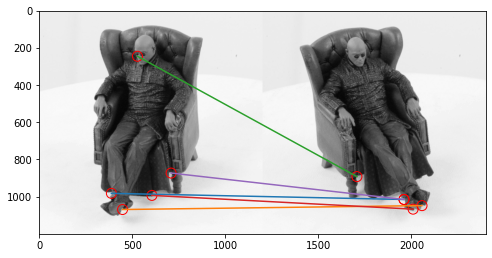

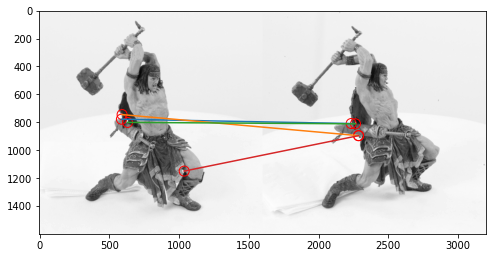

final Corners [(306, 477), (330, 835), (334, 1050), (344, 560), (351, 517), (359, 365), (373, 349), (384, 1019), (387, 982), (392, 1008), (423, 1097), (447, 1069), (488, 998), (527, 245), (586, 385), (605, 993), (708, 873), (714, 962), (745, 559), (819, 802)]
final Corners [(514, 906), (570, 857), (587, 778), (592, 745), (615, 588), (627, 785), (631, 801), (635, 264), (697, 195), (720, 131), (723, 1109), (791, 573), (879, 507), (897, 912), (910, 1384), (1037, 1150), (1054, 982), (1061, 949), (1088, 985), (1179, 1159)]
final Corners [(409, 574), (493, 619), (507, 892), (510, 994), (535, 248), (542, 886), (645, 994), (718, 318), (760, 1015), (809, 1067), (823, 914), (830, 481), (844, 543), (857, 1048), (879, 884), (882, 722), (883, 784), (885, 705), (890, 888), (895, 979)]
final Corners [(358, 569), (496, 944), (525, 1233), (534, 1226), (581, 309), (634, 809), (641, 118), (664, 796), (665, 811), (666, 554), (687, 896), (697, 910), (706, 168), (709, 999), (779, 815), (788, 814), (794, 100

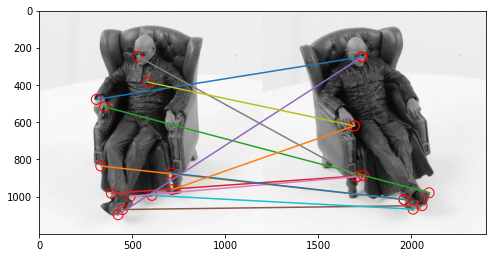

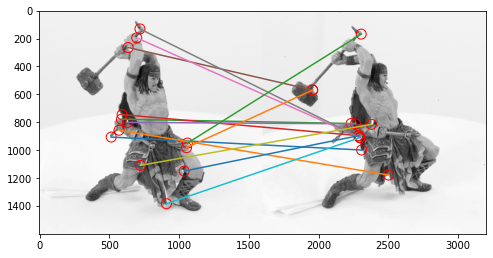

final Corners [(303, 751), (306, 477), (309, 800), (330, 835), (334, 1050), (344, 560), (351, 517), (359, 365), (373, 349), (384, 1019), (387, 982), (392, 1008), (423, 1097), (447, 1069), (488, 998), (499, 1027), (527, 245), (586, 385), (605, 993), (614, 978), (708, 873), (714, 962), (719, 805), (736, 587), (740, 596), (745, 559), (754, 798), (811, 152), (819, 802), (834, 799)]
final Corners [(476, 1191), (510, 895), (514, 906), (570, 857), (587, 778), (592, 745), (615, 588), (627, 785), (631, 801), (635, 264), (691, 80), (697, 195), (720, 131), (723, 1109), (725, 845), (731, 940), (743, 1034), (756, 375), (756, 384), (791, 573), (796, 978), (879, 507), (887, 557), (897, 912), (910, 1384), (1037, 1150), (1054, 982), (1061, 949), (1088, 985), (1179, 1159)]
final Corners [(335, 842), (391, 529), (409, 574), (448, 213), (493, 619), (497, 249), (497, 469), (507, 892), (510, 994), (535, 248), (542, 886), (645, 994), (686, 330), (718, 318), (760, 1015), (791, 627), (809, 1067), (823, 914), (

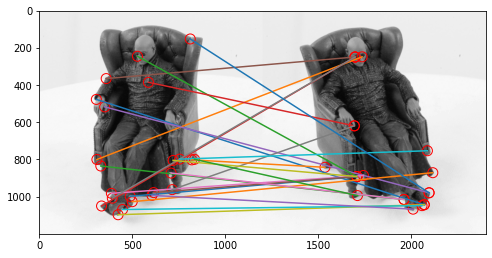

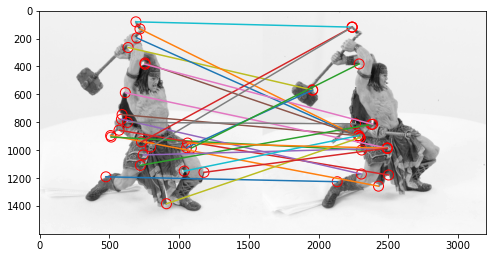

In [170]:
# detect corners on warrior and matrix sets
# you are free to modify code here, create your helper functions, etc.

nCornersLis = [10,20,30]  # do this for 10, 20 and 30 corners
smoothSTD = 2
windowSize = 13

# read images and detect corners on images

imgs_mat = []
crns_mat = []

imgs_war = []
crns_war = []

for nCorners in nCornersLis: 
    for i in range(2):
        img_sport = imageio.imread(gpath+'matrix/matrix' + str(i) + '.png')
        imgs_mat.append(rgb2gray(img_sport))
        # downsize your image in case corner_detect runs slow in test
        # imgs_mat.append(rgb2gray(img_mat)[::2, ::2])
        crns_mat.append(corner_detect(imgs_mat[i], nCorners, smoothSTD, windowSize))

        img_sport = imageio.imread(gpath+'warrior/warrior' + str(i) + '.png')
        imgs_war.append(rgb2gray(img_sport))
        # downsize your image in case corner_detect runs slow in test
        # imgs_war.append(rgb2gray(img_war)[::2, ::2])
        crns_war.append(corner_detect(imgs_war[i], nCorners, smoothSTD, windowSize))
    

    print("Number of Corners:", nCorners)
    R = 8
    NCCth = 0.7 
    matching_sport = naive_matching(imgs_mat[0]/255,
                                imgs_mat[1]/255, 
                                crns_mat[0], 
                                crns_mat[1], 
                                R, NCCth)
    show_matching_result(imgs_mat[0], imgs_mat[1], matching_sport)

    R = 8
    NCCth = 0.7 
    matching_sport = naive_matching(imgs_war[0]/255,
                                imgs_war[1]/255, 
                                crns_war[0], 
                                crns_war[1], 
                                R, NCCth)
    show_matching_result(imgs_war[0], imgs_war[1], matching_sport)
    imgs_mat = []
    crns_mat = []

    imgs_war = []
    crns_war = []
    

### Problem 4.4 Matching using epipolar geometry [10 pts]
Next, we will use the epipolar geometry constraint on the rectified images and updated corner points to build a better matching algorithm. First, detect 20 corners in image1. Then, for each corner, do a line search along the corresponding parallel epipolar line in image2.

Evaluate the NCC score for each point along this line and return the best match (or no match if all scores are below the NCCth). R is the radius (size) of the NCC patch in the code below.

You do not have to run this in both directions. Show your result as in the naive matching part. 

In [58]:
def display_correspondence(img1, img2, corrs):
    """Plot matching result on image pair given images and correspondences

    Args:
        img1: Image 1.
        img2: Image 2.
        corrs: Corner correspondence
    """
    
    """ ==========
    YOUR CODE HERE
    You may want to refer to the `show_matching_result` function.
    ========== """
    show_matching_result(img1,img2,corrs)
    

def correspondence_matching_epipole(img1, img2, corners1, R, NCCth):
    """Find corner correspondence along epipolar line.

    Args:
        img1: Image 1 (Rectified)
        img2: Image 2 (Rectified)
        corners1: Detected corners in image 1.
        R: NCC matching window radius.
        NCCth: NCC matching threshold.
    
    Returns:
        Matching result to be used in display_correspondence function
    """
    
    """ ==========
    YOUR CODE HERE
    ========== """
    matches = []
    for c1 in corners1:
      # i imgs
      row = c1[1]
      nccOfThisRow = {}
      for j in range(len(img2[0])):
        # c2 = img2[j][row]
        try:
          nccOfThisRow[j] = ncc_match(img1,img2,c1,[j,row],R)
          # print([row,j])
        except:
          pass
      col = max(nccOfThisRow, key=nccOfThisRow.get)
      maxNcc = nccOfThisRow[col]

      if maxNcc>=NCCth:
        matches.append((c1,[col,row]))
    print(matches)


    return np.array(matches)


      


In [59]:
rectified_im1_final, rectified_im2_final = completelyBoundedRectification(src1, src2, H1_bounded, H2_bounded,min_x1_bounded, max_x1_bounded,
                                   min_y1_bounded, max_y1_bounded,min_x2_bounded, max_x2_bounded,
                                   min_y2_bounded, max_y2_bounded)

  0%|          | 0/624 [00:00<?, ?it/s]

18133 went out


  0%|          | 0/624 [00:00<?, ?it/s]

18133 went out


In [60]:
# replace black pixels with white pixels
_black_idxs = (rectified_im1_final[:, :, 0] == 0) & (rectified_im1_final[:, :, 1] == 0) & (rectified_im1_final[:, :, 2] == 0)
rectified_im1_final[:, :][_black_idxs] = [1.0, 1.0, 1.0]
_black_idxs = (rectified_im2_final[:, :, 0] == 0) & (rectified_im2_final[:, :, 1] == 0) & (rectified_im2_final[:, :, 2] == 0)
rectified_im2_final[:, :][_black_idxs] = [1.0, 1.0, 1.0]

In [70]:
nCorners = 20
smoothSTD = 4
windowSize = 25
corners1 = corner_detect(rgb2gray(rectified_im1_final), nCorners, smoothSTD, windowSize)
# print(corners1)


final Corners [(12, 50), (14, 338), (17, 302), (58, 326), (84, 315), (84, 397), (91, 415), (199, 371), (202, 483), (206, 446), (280, 113), (300, 170), (324, 84), (333, 480), (359, 164), (359, 106), (546, 415), (567, 345), (581, 445), (743, 450)]


In [80]:



# Choose your threshold and NCC matching window radius
NCCth = 0.9
R = 8
# detect corners using corner detector here, store in corners1



[(array([202, 483]), [307, 483]), (array([280, 113]), [215, 113]), (array([300, 170]), [235, 170]), (array([324,  84]), [258, 84]), (array([359, 164]), [293, 164]), (array([359, 106]), [293, 106]), (array([546, 415]), [445, 415]), (array([567, 345]), [464, 345]), (array([581, 445]), [487, 445]), (array([743, 450]), [661, 450])]


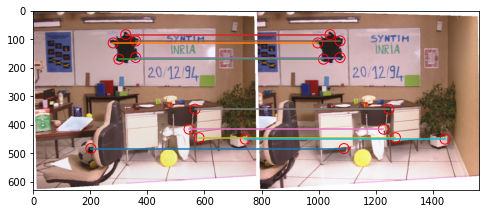

In [81]:
# corners1 = np.array( [(6, 46), (12, 192), (13, 287), (13, 313), (13, 269), (14, 350), (15, 325), (15, 260), (17, 619), (26, 326), (32, 339), (45, 317), (58, 324), (78, 390), (79, 333), (84, 404), (85, 514), (87, 12), (88, 319), (89, 48), (90, 417), (95, 292), (107, 11), (118, 519), (127, 611), (166, 503), (196, 366), (204, 483), (208, 448), (234, 606), (271, 108), (279, 536), (282, 321), (293, 268), (295, 173), (323, 81), (327, 181), (331, 487), (359, 129), (364, 165), (364, 103), (420, 333), (461, 452), (492, 323), (502, 325), (549, 327), (551, 408), (578, 451), (592, 319), (745, 444)])
# corners1 = corners1[:40]

corrs = correspondence_matching_epipole(rectified_im1_final, rectified_im2_final, corners1, R, NCCth)
display_correspondence(rectified_im1_final, rectified_im2_final, corrs)

In [82]:
print(corners1)
# print(corrs)

[[ 12  50]
 [ 14 338]
 [ 17 302]
 [ 58 326]
 [ 84 315]
 [ 84 397]
 [ 91 415]
 [199 371]
 [202 483]
 [206 446]
 [280 113]
 [300 170]
 [324  84]
 [333 480]
 [359 164]
 [359 106]
 [546 415]
 [567 345]
 [581 445]
 [743 450]]
